**TASK 1 : STOCK PREDICTION**

**AIM : TO PREDICT THE STOCK PRICE OF A COMPANY USING LSTM.**

**Import Libraries**

In [1]:
# Importing libraries for data analysis and visualization
import numpy as np # For linear algebra operations
import pandas as pd # For data preprocessing and manipulation
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For enhanced data visualization
%matplotlib inline

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Importing libraries for machine learning and deep learning
from sklearn.preprocessing import MinMaxScaler # For data normalization
from keras.models import Sequential # For creating a sequential neural network model
from keras.layers import Dense, Dropout, LSTM, Bidirectional # For defining diffe

In [2]:
df = pd.read_csv('GOOG.csv')

In [3]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [4]:
print("Shape of data:", df.shape)

Shape of data: (1258, 14)


In [5]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [7]:
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [8]:
df = df[['date','open','close']] # Extracting required columns
df['date'] = pd.to_datetime(df['date'].apply(lambda x: x.split()[0])) # converting object dtype of date column to datetime dtype
df.set_index('date',drop=True,inplace=True) # Setting date column as index
df.head(10)

,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71
2016-06-21,698.40,695.94
2016-06-22,699.06,697.46
2016-06-23,697.45,701.87
2016-06-24,675.17,675.22


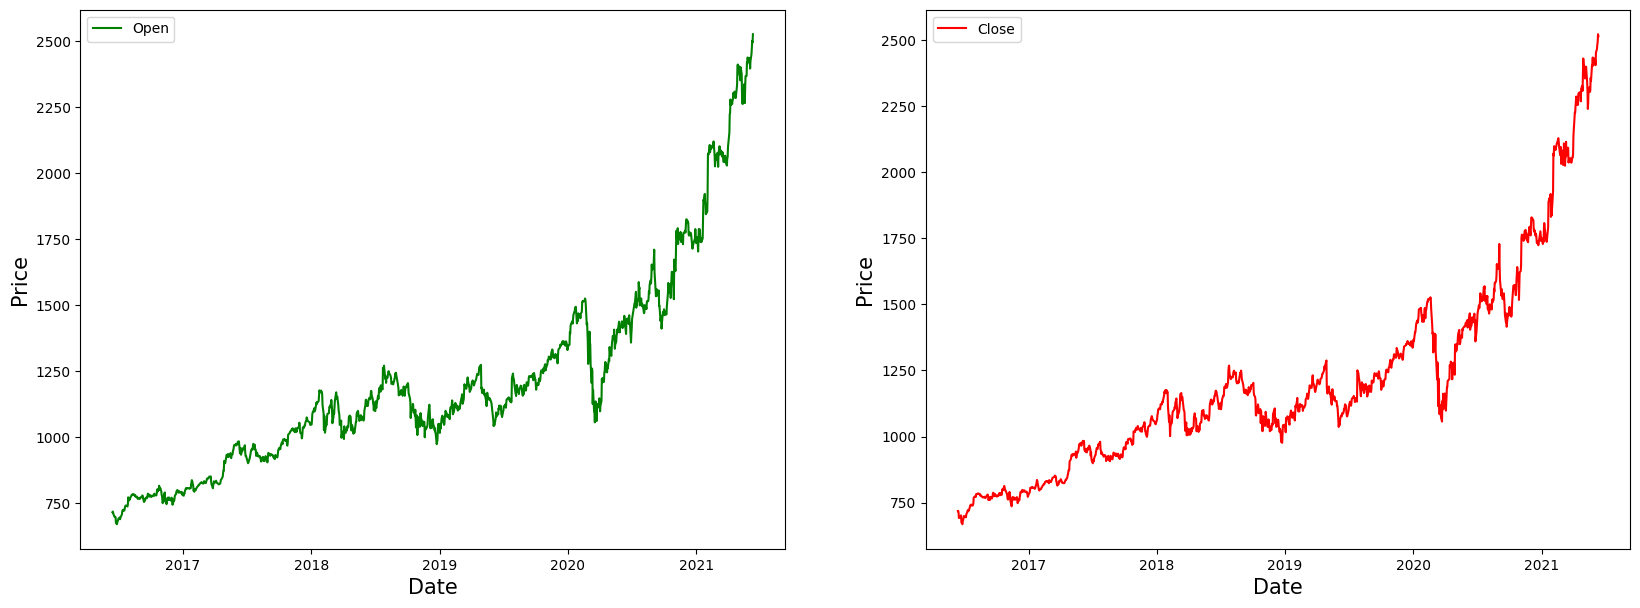

In [9]:
import matplotlib.pyplot as plt

# Creating a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

# Plotting the open prices
ax[0].plot(df['open'], label='Open', color='green')
ax[0].set_xlabel('Date', size=15)
ax[0].set_ylabel('Price', size=15)
ax[0].legend()

# Plotting the closing prices
ax[1].plot(df['close'], label='Close', color='red')
ax[1].set_xlabel('Date', size=15)
ax[1].set_ylabel('Price', size=15)
ax[1].legend()

# Displaying the plots
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Creating a MinMaxScaler object
MMS = MinMaxScaler()

# Applying Min-Max Scaling to normalize all values in the DataFrame
df[df.columns] = MMS.fit_transform(df)

# Displaying the first 10 rows of the normalized DataFrame
df.head(10)

,open,close
date,,
2016-06-14,0.024532,0.026984
2016-06-15,0.025891,0.027334
2016-06-16,0.023685,0.022716
2016-06-17,0.020308,0.012658
2016-06-20,0.014979,0.013732
2016-06-21,0.014779,0.014935
2016-06-22,0.015135,0.015755
2016-06-23,0.014267,0.018135
2016-06-24,0.002249,0.003755


In [11]:
# splitting the data into training and test set
training_size = round(len(df) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size

944

In [12]:
# Assuming 'training_size' has been defined before this code snippet
# and represents the number of rows to be used for training the model.

# Slicing the DataFrame 'df' to create 'train_data' containing the first 'training_size' rows
train_data = df[:training_size]

# Slicing the DataFrame 'df' to create 'test_data' containing the remaining rows after 'training_size'
test_data = df[training_size:]

# Printing the shapes of the newly created 'train_data' and 'test_data'
print(train_data.shape, test_data.shape)

(944, 2) (314, 2)


In [13]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [14]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((894, 50, 2), (894, 2), (264, 50, 2), (264, 2))

**Creating LSTM Model**

In [15]:
# Importing the required modules from Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

# Creating a Sequential model
model = Sequential()

# Adding an LSTM layer with 50 units, return_sequences=True is used to pass output to the next LSTM layer
# input_shape represents the shape of input sequences in the format (number_of_timesteps, number_of_features)
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_seq.shape[1], train_seq.shape[2])))

# Adding a Dropout layer to avoid overfitting (10% of the neurons will be randomly excluded during training)
model.add(Dropout(0.1))

# Adding another LSTM layer with 50 units (return_sequences=False by default for the last LSTM layer)
model.add(LSTM(units=50))

# Adding a Dense layer with 2 neurons (output layer)
model.add(Dense(2))

# Compiling the model with mean squared error loss and Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Displaying the summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
28/28 [==============================] - 8s 96ms/step - loss: 0.0084 - mean_absolute_error: 0.0648 - val_loss: 0.0108 - val_mean_absolute_error: 0.0839
Epoch 2/100
28/28 [==============================] - 1s 54ms/step - loss: 8.3968e-04 - mean_absolute_error: 0.0231 - val_loss: 0.0034 - val_mean_absolute_error: 0.0450
Epoch 3/100
28/28 [==============================] - 1s 53ms/step - loss: 4.6919e-04 - mean_absolute_error: 0.0159 - val_loss: 0.0027 - val_mean_absolute_error: 0.0399
Epoch 4/100
28/28 [==============================] - 1s 53ms/step - loss: 4.5927e-04 - mean_absolute_error: 0.0158 - val_loss: 0.0031 - val_mean_absolute_error: 0.0428
Epoch 5/100
28/28 [==============================] - 1s 53ms/step - loss: 4.1297e-04 - mean_absolute_error: 0.0150 - val_loss: 0.0024 - val_mean_absolute_error: 0.0372
Epoch 6/100
28/28 [==============================] - 2s 54ms/step - loss: 4.0298e-04 - mean_absolute_error: 0.0146 - val_loss: 0.0042 - val_mean_absolute_error: 0.0

In [17]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

9/9 [==============================] - 2s 31ms/step


array([[0.40086675, 0.4090375 ],
       [0.40082943, 0.4087353 ],
       [0.3982711 , 0.4059694 ],
       [0.40239474, 0.41012764],
       [0.40581793, 0.41359192]], dtype=float32)

In [18]:
# Inversing normalization/scaling on predicted data
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[1414.1749, 1426.3456],
       [1414.1057, 1425.7855],
       [1409.3628, 1420.6593],
       [1417.0076, 1428.366 ],
       [1423.354 , 1434.7865]], dtype=float32)

In [19]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-264:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-264:].index)], axis=1)

In [20]:
# Inversing normalization/scaling
df_merge[['open','close']] = MMS.inverse_transform(df_merge[['open','close']])
df_merge.head()

,open,close,open_predicted,close_predicted
date,,,,
2020-05-27,1417.25,1417.84,1414.174927,1426.345581
2020-05-28,1396.86,1416.73,1414.105713,1425.785522
2020-05-29,1416.94,1428.92,1409.362793,1420.659302
2020-06-01,1418.39,1431.82,1417.007568,1428.365967
2020-06-02,1430.55,1439.22,1423.354004,1434.786499


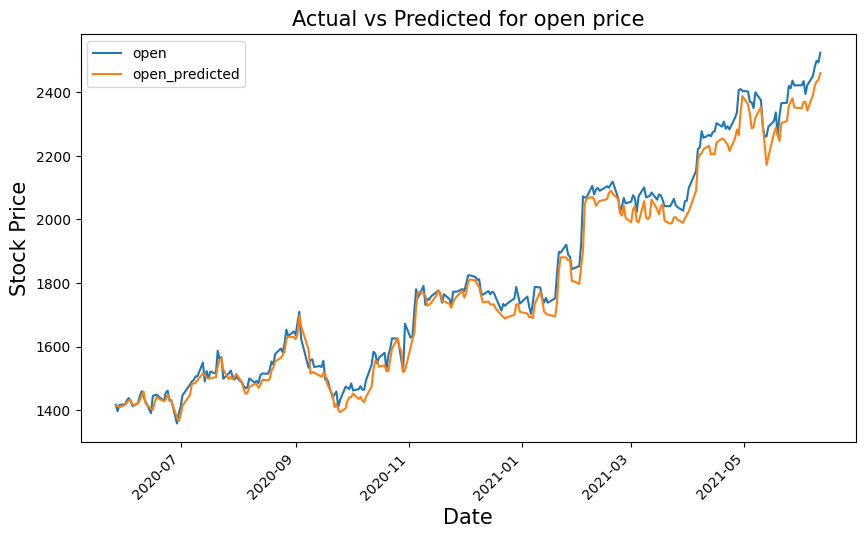

In [21]:
# plotting the actual open and predicted open prices on date index
df_merge[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

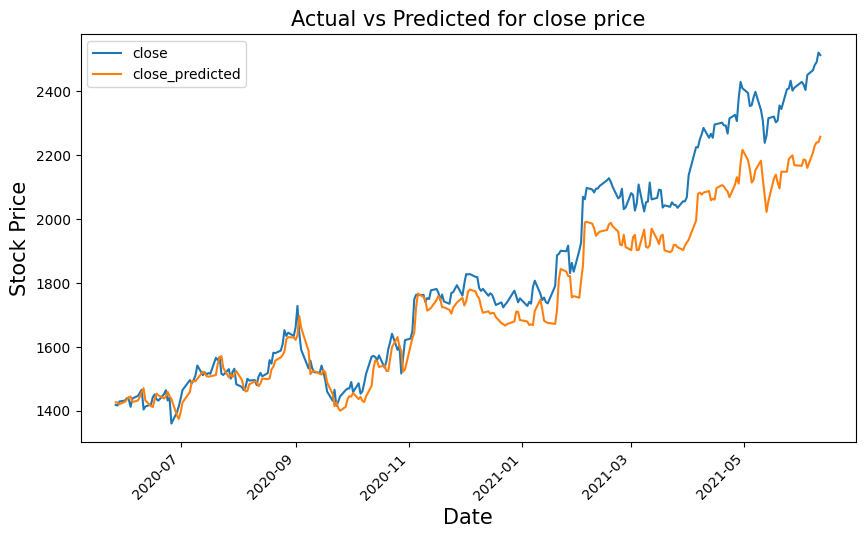

In [22]:
# plotting the actual close and predicted close prices on date index
df_merge[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [23]:
# Creating a dataframe and adding 10 days to existing index

df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
df_merge['2021-06-09':'2021-06-16']

,open,close,open_predicted,close_predicted
2021-06-09,2499.50,2491.40,2434.273682,2240.390625
2021-06-10,2494.01,2521.60,2438.891846,2240.862793
2021-06-11,2524.92,2513.93,2460.295654,2258.142578
2021-06-12,NaN,NaN,NaN,NaN
2021-06-13,NaN,NaN,NaN,NaN
2021-06-14,NaN,NaN,NaN,NaN
2021-06-15,NaN,NaN,NaN,NaN
2021-06-16,NaN,NaN,NaN,NaN


In [24]:
# creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [25]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)


1/1 [==============================] - 0s 42ms/step


In [27]:
# inversing Normalization/scaling
upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['open','close']])


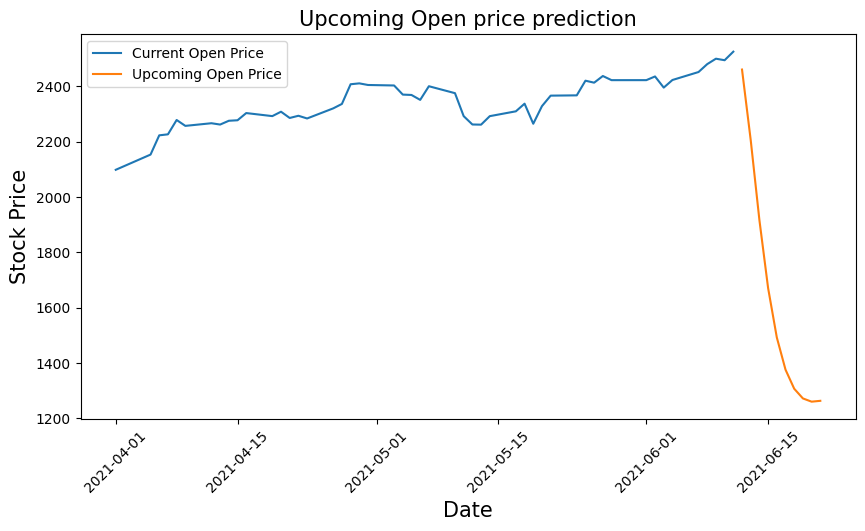

In [28]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

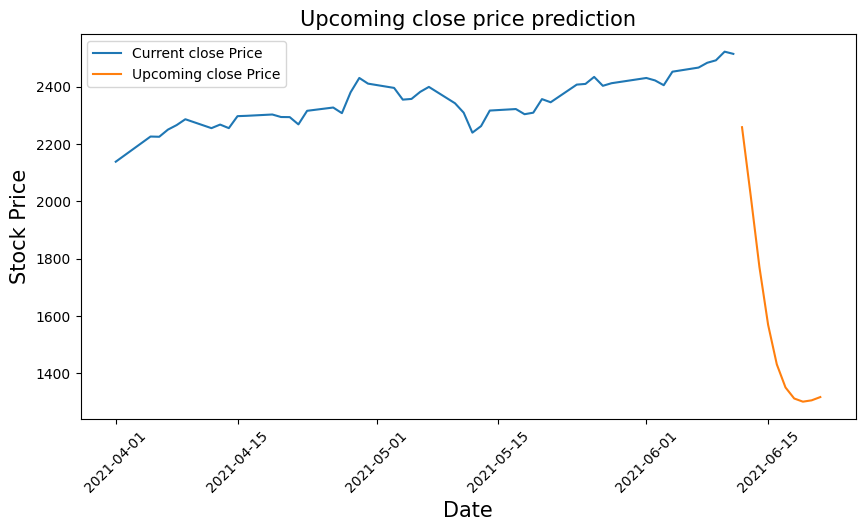

In [29]:
# plotting Upcoming Close price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()